In [1]:
using MagneticLaplacianSparsifier
using Graphs, MetaGraphs, Random, IterTools, LinearAlgebra, GraphPlot, Arpack, Plots, SparseArrays
using Statistics
using Measures
using StatsBase, JLD

### Approximate SyncRank with sparsified Laplacian 


MUN graph model

method: DPP(K) unif
least eigenvalue of sparsifier: 0.0002704365130643289


least eigenvalue of sparsifier: 0.004382082914768083
least eigenvalue of sparsifier: 

0.008226738361067363


least eigenvalue of sparsifier: 0.008200382024426009
least eigenvalue of sparsifier: 

0.00953098130183296


least eigenvalue of sparsifier: 0.008576476237356585
least eigenvalue of sparsifier: 

0.010636004505409392


method: DPP(K) JL-LS
least eigenvalue of sparsifier: 0.00047589600231137436


least eigenvalue of sparsifier: 0.006042170640523213
least eigenvalue of sparsifier: 

0.007662038920377329


least eigenvalue of sparsifier: 0.009690878965583676
least eigenvalue of sparsifier: 

0.009398602243650798


least eigenvalue of sparsifier: 0.010050231043615663
least eigenvalue of sparsifier: 

0.01072242633015278


method: DPP(K) LS
least eigenvalue of sparsifier: 0.0004662935087086875


least eigenvalue of sparsifier: 0.005855809265718404
least eigenvalue of sparsifier: 

0.007400875768160003


least eigenvalue of sparsifier: 0.008705100745981258
least eigenvalue of sparsifier: 

0.008175518184081071


least eigenvalue of sparsifier: 0.009091499425819811
least eigenvalue of sparsifier: 

0.009217010196866488


method: iid JL-LS
least eigenvalue of sparsifier: 9.863016051050744e-5


least eigenvalue of sparsifier: 0.0011534524567629533
least eigenvalue of sparsifier: 

0.006082431599956514


least eigenvalue of sparsifier: 0.008477267054992133
least eigenvalue of sparsifier: 

0.00896616987460577


least eigenvalue of sparsifier: 0.009623472953230352
least eigenvalue of sparsifier: 

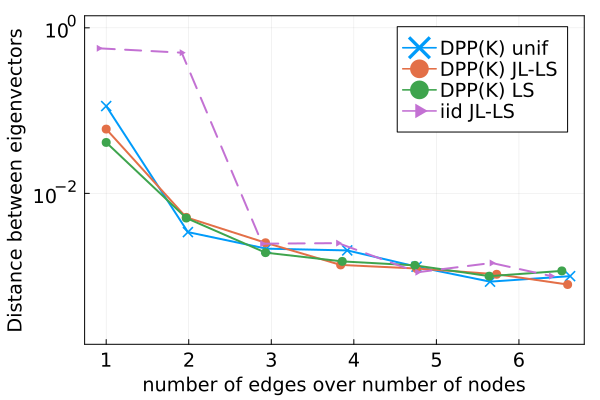

0.010836258030758788


In [12]:
type = "MUN" 

rng = Random.default_rng()

# graph parameters
n = 100
p = 0.9
eta = 0.2

# planted ranking score
planted_score = randperm(rng,n)

# graph model
if type=="MUN"
    meta_g = gen_graph_mun(rng, n, p, eta;planted_score)
elseif type=="ERO"
    meta_g = gen_graph_ero(rng, n, p, eta;planted_score)
end

# simulation parameters
n_batch = 7 # maximum number of batches considered
n_rep = 1 # number of runs

# regularization parameter
q = 0

# storing settings
D_params = Dict("n" => n,"p" => p,"eta" => eta,"q" => q,"n_batch" => n_batch,"n_rep" => n_rep)

# print least eigenvalues
# B = magnetic_incidence(meta_g)
# l = eigvals(B' * B)
# println("least eigenvalue: ", l[1:3])


methods = [
    "DPP(K) unif",
    "DPP(K) JL-LS",
    "DPP(K) LS",
    "iid JL-LS",
    # "iid LS",
    #"ST JL-LS",
    # "ST LS",
]

D_results = benchmark_syncrank(meta_g,planted_score, n_batch, n_rep, rng; methods)
# plotting distance between eigenvectors
metric= "err"
y_limits = (1.5*1e-4, 1.4)
legendposition=:topright
plot_comparison_sync(metric,D_results,y_limits;legendposition,methods)
name = "syncrank_"*metric*"_"*type*"n"*string(n)*"p"*string(p)*"eta"*string(eta)*"q"*string(q)

# saving plot
savefig("figures/"*name*".pdf")

# saving results
save("figures/"*name*"_data.jld", "D_results", D_results,"D_params", D_params)

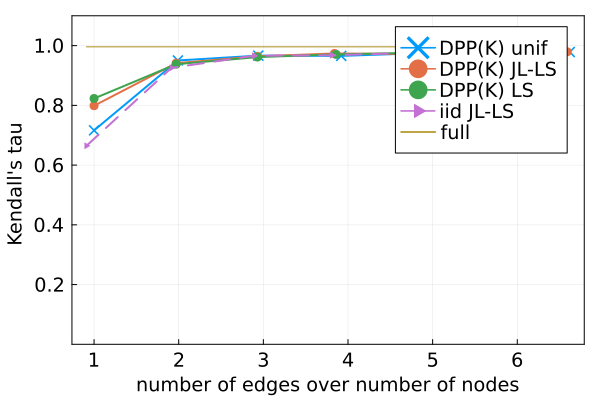

In [13]:
# plotting Kendall's tau between rankings

metric= "tau" 
y_limits = (1.5*1e-4, 1.1)

legendposition=:bottomright
plot_comparison_sync(metric,D_results,y_limits;legendposition,methods)

name = "syncrank_"*metric*"_"*type*"n"*string(n)*"p"*string(p)*"eta"*string(eta)*"q"*string(q)

# saving plot
savefig("figures/"*name*".pdf")

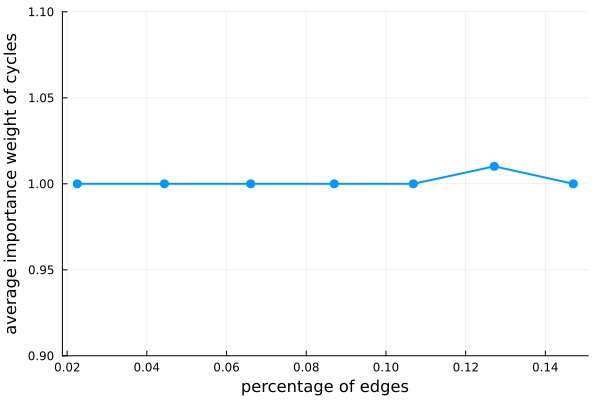

In [15]:
# plotting average importance weight of cycles
metric = "weight"
metric_std = metric * "_std"

method = "DPP(K) LS"
D = D_results[method]
n = D["n"]
m = D["m"]
x = D["pc_edges"]
y = D[metric]
y_er = D[metric_std]
y_limits = (0.9, 1.1)

plt = plot(
    x,
    y;
    yerror=y_er,
    markerstrokecolor=:auto,
    markershape=:circle,
    markersize=5,
    linewidth=2,
    markerstrokewidth=2,
    legend = false
)
xlabel!("percentage of edges")
ylabel!("average importance weight of cycles")

ylims!(y_limits)

display(plt)

name = "syncrank_"*metric*"_"*type*"n"*string(n)*"p"*string(p)*"eta"*string(eta)*"q"*string(q)

# saving plot
savefig("figures/"*name*".pdf")

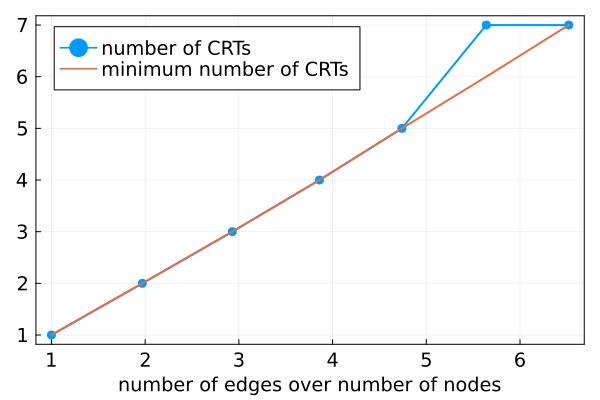

In [16]:
# plotting number of cycle rooted trees wrt number of batches

method = "DPP(K) LS"
legendposition=:topleft
plot_nb_cycles(D_results,method;legendposition)

metric = "number_CRTs"
name = "syncrank_"*metric*"_"*type*"n"*string(n)*"p"*string(p)*"eta"*string(eta)*"q"*string(q)

# saving plot
savefig("figures/"*name*".pdf")


 ERO graph model

method: DPP(K) unif
least eigenvalue of sparsifier: 0.0011529860051113926


least eigenvalue of sparsifier: 0.0009379383130800408
least eigenvalue of sparsifier: 

0.0013012672822485718


least eigenvalue of sparsifier: 0.0010861089856341244
least eigenvalue of sparsifier: 

0.00107855960463217


least eigenvalue of sparsifier: 0.0013178585700202887
least eigenvalue of sparsifier: 

0.0013255091005009655


least eigenvalue of sparsifier: 0.002664206748055089
least eigenvalue of sparsifier: 

0.003313560715828708


least eigenvalue of sparsifier: 0.0009327843060046041
least eigenvalue of sparsifier: 

0.08224453978962845


least eigenvalue of sparsifier: 0.08428190438027594
least eigenvalue of sparsifier: 

0.08230040548189864


least eigenvalue of sparsifier: 0.09477815553234498
least eigenvalue of sparsifier: 

0.10155577265052723


least eigenvalue of sparsifier: 0.0752785274547694
least eigenvalue of sparsifier: 

0.087752680536457


least eigenvalue of sparsifier: 0.11151871503941715
least eigenvalue of sparsifier: 

0.0931033866033675


least eigenvalue of sparsifier: 0.0812215686544881
least eigenvalue of sparsifier: 

0.10687811681311266


least eigenvalue of sparsifier: 0.1323086073840818
least eigenvalue of sparsifier: 

0.12035793493573088


least eigenvalue of sparsifier: 0.13260471719837247
least eigenvalue of sparsifier: 

0.11440115647987656


least eigenvalue of sparsifier: 0.14898141525995018
least eigenvalue of sparsifier: 

0.14322187535195663


least eigenvalue of sparsifier: 0.13520311603210955
least eigenvalue of sparsifier: 

0.11201371217115746


least eigenvalue of sparsifier: 0.14263955425004468
least eigenvalue of sparsifier: 

0.14814088521806856


least eigenvalue of sparsifier: 0.16992144274514953
least eigenvalue of sparsifier: 

0.16239289150274533


least eigenvalue of sparsifier: 0.12554340520627627
least eigenvalue of sparsifier: 

0.13388272023412934


least eigenvalue of sparsifier: 0.11900121339781387
least eigenvalue of sparsifier: 

0.16635128995073972


least eigenvalue of sparsifier: 0.12012378103352586
least eigenvalue of sparsifier: 

0.14644375310463942


least eigenvalue of sparsifier: 0.15530872799608833
least eigenvalue of sparsifier: 

0.14177146273528263


least eigenvalue of sparsifier: 0.15676275327711178
least eigenvalue of sparsifier: 

0.1443558203770957


least eigenvalue of sparsifier: 0.15556532881691637
least eigenvalue of sparsifier: 

0.13956955821382044


least eigenvalue of sparsifier: 0.13837658800626487
least eigenvalue of sparsifier: 

0.1482081691245975


least eigenvalue of sparsifier: 0.16008094327034716
least eigenvalue of sparsifier: 

0.16433572902036


least eigenvalue of sparsifier: 0.14166341438913954
least eigenvalue of sparsifier: 

0.1838369228676221


least eigenvalue of sparsifier: 0.17200465498737794
least eigenvalue of sparsifier: 

0.1662216583757546


least eigenvalue of sparsifier: 0.20306351008949788
least eigenvalue of sparsifier: 

0.17568283314212962


least eigenvalue of sparsifier: 0.16950830761522132
least eigenvalue of sparsifier: 

0.17162347287793683


least eigenvalue of sparsifier: 0.1566433154711252
least eigenvalue of sparsifier: 

0.15890197318438792


least eigenvalue of sparsifier: 0.16850454259661776
least eigenvalue of sparsifier: 

0.1817021199647838


least eigenvalue of sparsifier: 0.1574388953008094
least eigenvalue of sparsifier: 

0.19078280752168958


least eigenvalue of sparsifier: 0.206661858715723
least eigenvalue of sparsifier: 

0.18409159643257617


least eigenvalue of sparsifier: 0.1550660282832854
least eigenvalue of sparsifier: 

0.16905407077722123


least eigenvalue of sparsifier: 0.18366237117626494
least eigenvalue of sparsifier: 

0.16027313278539865


least eigenvalue of sparsifier: 0.1785635427722333
method: 

DPP(K) JL-LS
least eigenvalue of sparsifier: 0.0012925629908902571
least eigenvalue of sparsifier: 

0.0005466644188541149


least eigenvalue of sparsifier: 0.0009080781490562262
least eigenvalue of sparsifier: 

0.00048135325929936465


least eigenvalue of sparsifier: 0.0019537181029640614
least eigenvalue of sparsifier: 

0.0011899615543027235


least eigenvalue of sparsifier: 0.00033186347471788274
least eigenvalue of sparsifier: 

0.0007882303828130173


least eigenvalue of sparsifier: 0.0015735199881038052
least eigenvalue of sparsifier: 

0.0009983700747625613


least eigenvalue of sparsifier: 0.1023699473008764
least eigenvalue of sparsifier: 

0.08062244378393421


least eigenvalue of sparsifier: 0.0819344586586474
least eigenvalue of sparsifier: 

0.07750021206033911


least eigenvalue of sparsifier: 0.09258388448944124
least eigenvalue of sparsifier: 

0.091298229362334


least eigenvalue of sparsifier: 0.0766360817278163
least eigenvalue of sparsifier: 

0.10710618300221025


least eigenvalue of sparsifier: 0.07608374646003219
least eigenvalue of sparsifier: 

0.09653607708801405


least eigenvalue of sparsifier: 0.10376750025043413
least eigenvalue of sparsifier: 

0.10329360742786098


least eigenvalue of sparsifier: 0.12427417767379638
least eigenvalue of sparsifier: 

0.1144424437431219


least eigenvalue of sparsifier: 0.09952401970877278
least eigenvalue of sparsifier: 

0.12635793615264632


least eigenvalue of sparsifier: 0.09323746028138385
least eigenvalue of sparsifier: 

0.1371788684644431


least eigenvalue of sparsifier: 0.10622785401691223
least eigenvalue of sparsifier: 

0.10229234786482425


least eigenvalue of sparsifier: 0.14314452265490696
least eigenvalue of sparsifier: 

0.15677830626060085


least eigenvalue of sparsifier: 0.1641920177443842
least eigenvalue of sparsifier: 

0.15220726351274486


least eigenvalue of sparsifier: 0.11052030695055926
least eigenvalue of sparsifier: 

0.13327716226036262


least eigenvalue of sparsifier: 0.1539296951303557
least eigenvalue of sparsifier: 

0.15105768521859744


least eigenvalue of sparsifier: 0.13912593843131227
least eigenvalue of sparsifier: 

0.12272050749258598


least eigenvalue of sparsifier: 0.1445886314593244
least eigenvalue of sparsifier: 

0.140033917613278


least eigenvalue of sparsifier: 0.15540895178004765
least eigenvalue of sparsifier: 

0.1383772852122242


least eigenvalue of sparsifier: 0.17726856458724033
least eigenvalue of sparsifier: 

0.1752313178514858


least eigenvalue of sparsifier: 0.1486738909885389
least eigenvalue of sparsifier: 

0.1727705291606738


least eigenvalue of sparsifier: 0.1405608293628497
least eigenvalue of sparsifier: 

0.15918546952622412


least eigenvalue of sparsifier: 0.1668972568967283
least eigenvalue of sparsifier: 

0.17683205705062183


least eigenvalue of sparsifier: 0.1821252587105201
least eigenvalue of sparsifier: 

0.1700174650309609


least eigenvalue of sparsifier: 0.1645715869750263
least eigenvalue of sparsifier: 

0.15239120811886464


least eigenvalue of sparsifier: 0.15087778794467893
least eigenvalue of sparsifier: 

0.1619446836413726


least eigenvalue of sparsifier: 0.1824745543927977
least eigenvalue of sparsifier: 

0.17658390050676692


least eigenvalue of sparsifier: 0.20045298621655722
least eigenvalue of sparsifier: 

0.145311671124974


least eigenvalue of sparsifier: 0.1722975770732048
least eigenvalue of sparsifier: 

0.16832343053353763


least eigenvalue of sparsifier: 0.1550804597564881
least eigenvalue of sparsifier: 

0.14919895873318473


least eigenvalue of sparsifier: 0.16886193434080998
least eigenvalue of sparsifier: 

0.16021855637190893


least eigenvalue of sparsifier: 0.17319587878192538
least eigenvalue of sparsifier: 

0.17856919735909427


method: DPP(K) LS
least eigenvalue of sparsifier: 0.001315171118706501


least eigenvalue of sparsifier: 0.0011626117218741087
least eigenvalue of sparsifier: 

0.0008755874000092878


least eigenvalue of sparsifier: 0.0009144309519179732
least eigenvalue of sparsifier: 

0.0017494753117893139


least eigenvalue of sparsifier: 0.0007123396067293874
least eigenvalue of sparsifier: 

0.0019473230833510337


least eigenvalue of sparsifier: 0.0005414868327279858
least eigenvalue of sparsifier: 

0.00220797791367473


least eigenvalue of sparsifier: 0.0005552962227419666
least eigenvalue of sparsifier: 

0.10460234937989732


least eigenvalue of sparsifier: 0.08073965124321497
least eigenvalue of sparsifier: 

0.1089140115245588


least eigenvalue of sparsifier: 0.06376967952492489
least eigenvalue of sparsifier: 

0.0763693516134673


least eigenvalue of sparsifier: 0.08752812979396457
least eigenvalue of sparsifier: 

0.08951004664219463


least eigenvalue of sparsifier: 0.09278206008843265
least eigenvalue of sparsifier: 

0.06574559972533552


least eigenvalue of sparsifier: 0.08029279587394496
least eigenvalue of sparsifier: 

0.11678785859036075


least eigenvalue of sparsifier: 0.1263561968107185
least eigenvalue of sparsifier: 

0.12154441362892224


least eigenvalue of sparsifier: 0.1188580870738091
least eigenvalue of sparsifier: 

0.12025693589158384


least eigenvalue of sparsifier: 0.10529696013031473
least eigenvalue of sparsifier: 

0.12750241853120087


least eigenvalue of sparsifier: 0.11365377352137662
least eigenvalue of sparsifier: 

0.13777659991434102


least eigenvalue of sparsifier: 0.11447742149512427
least eigenvalue of sparsifier: 

0.1138029781849248


least eigenvalue of sparsifier: 0.1369330936860791
least eigenvalue of sparsifier: 

0.13448039949598964


least eigenvalue of sparsifier: 0.13993713987437423
least eigenvalue of sparsifier: 

0.16858082688538445


least eigenvalue of sparsifier: 0.16079852203999284
least eigenvalue of sparsifier: 

0.15465018634104438


least eigenvalue of sparsifier: 0.11142514855051922
least eigenvalue of sparsifier: 

0.16801245968166054


least eigenvalue of sparsifier: 0.11225140026525662
least eigenvalue of sparsifier: 

0.1407044372975209


least eigenvalue of sparsifier: 0.14862789371778506
least eigenvalue of sparsifier: 

0.15602397346824332


least eigenvalue of sparsifier: 0.14010897665458322
least eigenvalue of sparsifier: 

0.1496656226045533


least eigenvalue of sparsifier: 0.16508961225642296
least eigenvalue of sparsifier: 

0.14859651146442243


least eigenvalue of sparsifier: 0.14564780619136128
least eigenvalue of sparsifier: 

0.1818062517872964


least eigenvalue of sparsifier: 0.11854121325732384
least eigenvalue of sparsifier: 

0.15691552976256296


least eigenvalue of sparsifier: 0.1466595629577097
least eigenvalue of sparsifier: 

0.15117757544609237


least eigenvalue of sparsifier: 0.16927737044743896
least eigenvalue of sparsifier: 

0.15980300377394235


least eigenvalue of sparsifier: 0.1692680780422346
least eigenvalue of sparsifier: 

0.17338911480252214


least eigenvalue of sparsifier: 0.19396487349283292
least eigenvalue of sparsifier: 

0.15026277999973692


least eigenvalue of sparsifier: 0.14344741128659222
least eigenvalue of sparsifier: 

0.17782751219128012


least eigenvalue of sparsifier: 0.17253662106227402
least eigenvalue of sparsifier: 

0.17260130194100826


least eigenvalue of sparsifier: 0.1542649535828031
least eigenvalue of sparsifier: 

0.16007282301863024


least eigenvalue of sparsifier: 0.18068346343304803
least eigenvalue of sparsifier: 

0.17336602931765382


least eigenvalue of sparsifier: 0.15799063495685695
least eigenvalue of sparsifier: 

0.19533819271008201


least eigenvalue of sparsifier: 0.15978661581544273
method: 

iid JL-LS
least eigenvalue of sparsifier: 8.915863072245968e-13
least eigenvalue of sparsifier: 

3.4717136974360326e-12


least eigenvalue of sparsifier: 7.368812621190683e-14
least eigenvalue of sparsifier: 

1.0334329590596675e-8


least eigenvalue of sparsifier: 4.1867377084641445e-7
least eigenvalue of sparsifier: 

8.723271091400138e-11


least eigenvalue of sparsifier: 2.5913992689106615e-13
least eigenvalue of sparsifier: 

8.361707413754548e-14


least eigenvalue of sparsifier: 7.703823503958383e-12
least eigenvalue of sparsifier: 

3.4083892532665836e-11


least eigenvalue of sparsifier: 2.1216490631833997e-13
least eigenvalue of sparsifier: 

5.1367024941562837e-14


least eigenvalue of sparsifier: 0.06206452661186449
least eigenvalue of sparsifier: 

7.710513355733701e-13


least eigenvalue of sparsifier: 5.447303568205038e-13
least eigenvalue of sparsifier: 

2.2636211239898442e-13


least eigenvalue of sparsifier: 4.4644757241577616e-14
least eigenvalue of sparsifier: 

4.300899642917561e-12


least eigenvalue of sparsifier: 1.4577289234642114e-12
least eigenvalue of sparsifier: 

6.699487364142105e-14


least eigenvalue of sparsifier: 0.13147016180467933
least eigenvalue of sparsifier: 

7.398141205228997e-14


least eigenvalue of sparsifier: 7.81373383956019e-11
least eigenvalue of sparsifier: 

0.10072045705148329


least eigenvalue of sparsifier: 2.2992345886888556e-12
least eigenvalue of sparsifier: 

0.12741730034345172


least eigenvalue of sparsifier: 0.11911432024580301
least eigenvalue of sparsifier: 

0.0833153796643706


least eigenvalue of sparsifier: 0.0916258863111051
least eigenvalue of sparsifier: 

0.1416342096947279


least eigenvalue of sparsifier: 0.14045747891862692
least eigenvalue of sparsifier: 

0.09351637876605494


least eigenvalue of sparsifier: 0.11655147186539325
least eigenvalue of sparsifier: 

0.09650577209198384


least eigenvalue of sparsifier: 2.9575834002427415e-11
least eigenvalue of sparsifier: 

0.1316713582239583


least eigenvalue of sparsifier: 0.12782147364663216
least eigenvalue of sparsifier: 

0.1407904162459334


least eigenvalue of sparsifier: 0.10126222837845428
least eigenvalue of sparsifier: 

0.10306745248507893


least eigenvalue of sparsifier: 0.124062801910631
least eigenvalue of sparsifier: 

0.14173358647967743


least eigenvalue of sparsifier: 0.17951907220019167
least eigenvalue of sparsifier: 

0.15042326547712148


least eigenvalue of sparsifier: 0.12873653365822685
least eigenvalue of sparsifier: 

0.13848725458490424


least eigenvalue of sparsifier: 0.15711327050709742
least eigenvalue of sparsifier: 

0.1490092440311931


least eigenvalue of sparsifier: 0.1672196410601006
least eigenvalue of sparsifier: 

0.12997453160681982


least eigenvalue of sparsifier: 0.1730424881181075
least eigenvalue of sparsifier: 

0.201487411013201


least eigenvalue of sparsifier: 0.14282817684953408
least eigenvalue of sparsifier: 

0.12690157628681648


least eigenvalue of sparsifier: 0.13971553616921312
least eigenvalue of sparsifier: 

0.15774274829927423


least eigenvalue of sparsifier: 0.15848970741530372
least eigenvalue of sparsifier: 

0.17759828344136297


least eigenvalue of sparsifier: 0.14079436605051598
least eigenvalue of sparsifier: 

0.16860360855248763


least eigenvalue of sparsifier: 0.1652070981269058
least eigenvalue of sparsifier: 

0.1446192705843667


least eigenvalue of sparsifier: 0.1691543389503255
least eigenvalue of sparsifier: 

0.1891702847915468


least eigenvalue of sparsifier: 0.11834088390419298
least eigenvalue of sparsifier: 

0.17947115383471934


least eigenvalue of sparsifier: 0.1655872804011937
least eigenvalue of sparsifier: 

0.16095908296271377


least eigenvalue of sparsifier: 0.16285445102072593
least eigenvalue of sparsifier: 

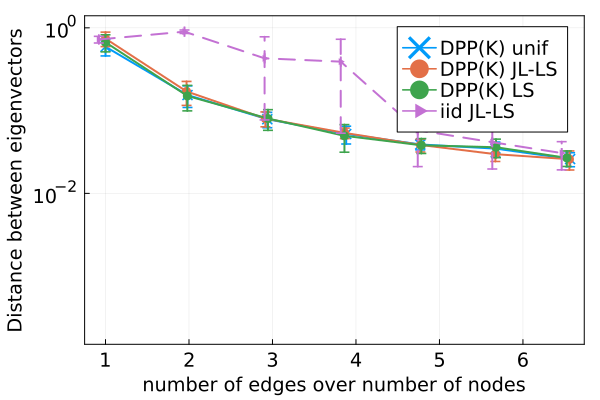

0.18117596467796976


In [17]:
type = "ERO" 

rng = Random.default_rng()

# graph parameters
n = 100
p = 0.9
eta = 0.2

# planted ranking score
planted_score = randperm(rng,n)

# graph model
if type=="MUN"
    meta_g = gen_graph_mun(rng, n, p, eta;planted_score)
elseif type=="ERO"
    meta_g = gen_graph_ero(rng, n, p, eta;planted_score)
end

# simulation parameters
n_batch = 7 # maximum number of batches considered
n_rep = 10 # number of runs

# regularization parameter
q = 0

# storing settings
D_params = Dict("n" => n,"p" => p,"eta" => eta,"q" => q,"n_batch" => n_batch,"n_rep" => n_rep)

# print least eigenvalues
# B = magnetic_incidence(meta_g)
# l = eigvals(B' * B)
# println("least eigenvalue: ", l[1:3])

D_results = benchmark_syncrank(meta_g,planted_score, n_batch, n_rep, rng;methods)

# plotting distance between eigenvectors
metric= "err"
y_limits = (1.5*1e-4, 1.4)
legendposition=:bottomright
plot_comparison_sync(metric,D_results,y_limits;legendposition,methods)
name = "syncrank_"*metric*"_"*type*"n"*string(n)*"p"*string(p)*"eta"*string(eta)*"q"*string(q)

# saving plot
savefig("figures/"*name*".pdf")

# saving results
save("figures/"*name*"_data.jld", "D_results", D_results,"D_params", D_params)

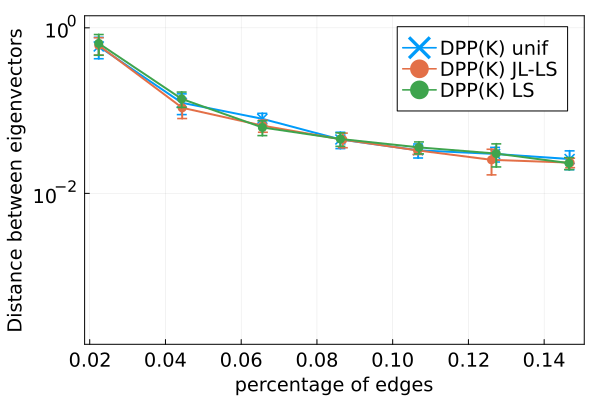

In [7]:
# plotting distance between eigenvectors
metric= "err"
y_limits = (1.5*1e-4, 1.4)
legendposition=:bottomright
plot_comparison_sync(metric,D_results,y_limits;legendposition,methods)
name = "syncrank_"*metric*"_"*type*"n"*string(n)*"p"*string(p)*"eta"*string(eta)*"q"*string(q)

# saving plot
savefig("figures/"*name*".pdf")

# saving results
save("figures/"*name*"_data.jld", "D_results", D_results,"D_params", D_params)

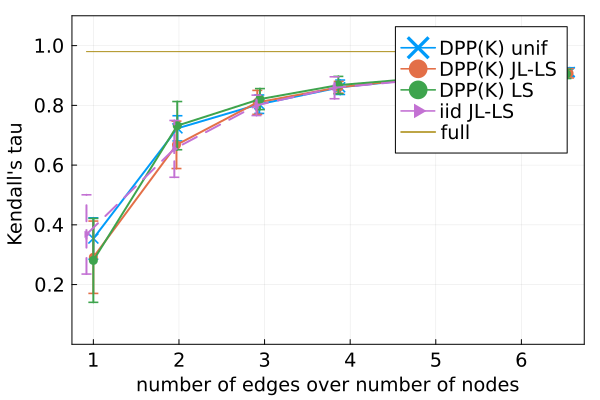

In [19]:
# plotting Kendall's tau between rankings

metric= "tau" 
y_limits = (1.5*1e-4, 1.1)

legendposition=:bottomright
plot_comparison_sync(metric,D_results,y_limits;legendposition, methods)

name = "syncrank_"*metric*"_"*type*"n"*string(n)*"p"*string(p)*"eta"*string(eta)*"q"*string(q)

# saving plot
savefig("figures/"*name*".pdf")

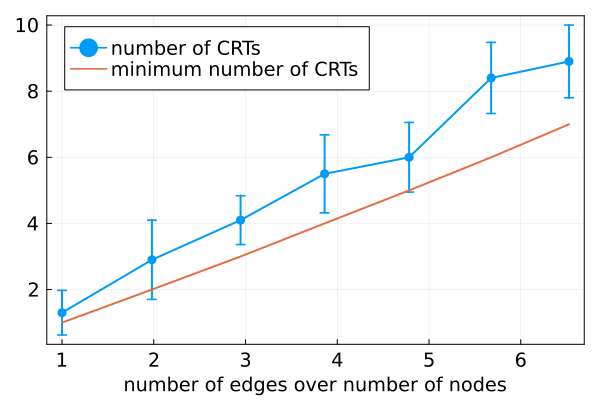

In [20]:
# plotting number of cycle rooted trees wrt number of batches

method = "DPP(K) LS"
legendposition=:topleft
plot_nb_cycles(D_results,method;legendposition)

metric = "number_CRTs"
name = "syncrank_"*metric*"_"*type*"n"*string(n)*"p"*string(p)*"eta"*string(eta)*"q"*string(q)

# saving plot
savefig("figures/"*name*".pdf")

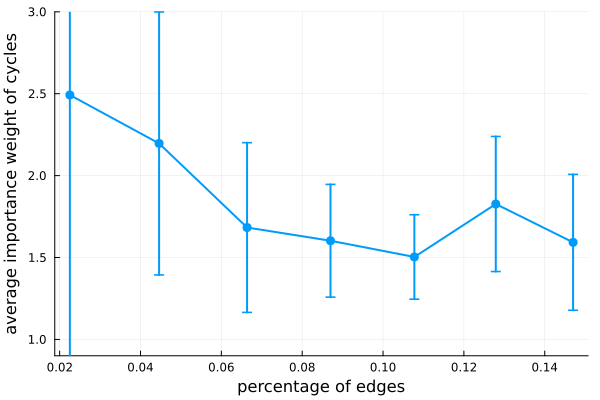

In [22]:
# plotting average importance weight of cycles
metric = "weight"
metric_std = metric * "_std"

method = "DPP(K) LS"
D = D_results[method]
x = D["pc_edges"]
y = D[metric]
y_er = D[metric_std]
y_limits = (0.9, 3)

plt = plot(
    x,
    y;
    yerror=y_er,
    markerstrokecolor=:auto,
    markershape=:circle,
    markersize=5,
    linewidth=2,
    markerstrokewidth=2,
    legend = false
)
xlabel!("percentage of edges")
ylabel!("average importance weight of cycles")

ylims!(y_limits)

display(plt)

name = "syncrank_"*metric*"_"*type*"n"*string(n)*"p"*string(p)*"eta"*string(eta)*"q"*string(q)

# saving plot
savefig("figures/"*name*".pdf")